In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,40]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score                best_params
0                  svm    0.980000  {'C': 1, 'kernel': 'rbf'}
1        random_forest    0.966667       {'n_estimators': 40}
2  logistic_regression    0.966667                   {'C': 5}

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

Text(66.5, 0.5, 'Truth')

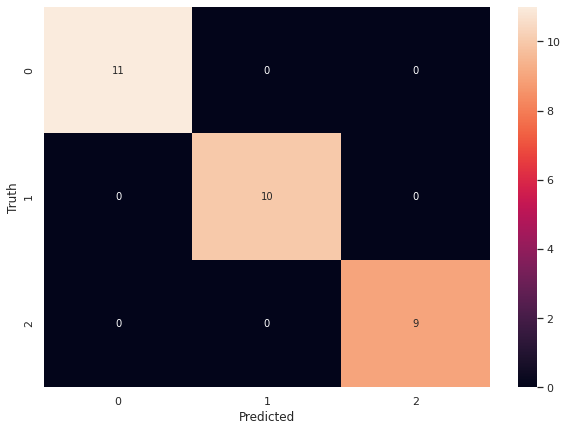

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt




In [ ]:
iris = load_iris()

In [ ]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x:iris.target_names[x])
df.head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  flower
0                5.1               3.5  ...               0.2  setosa
1                4.9               3.0  ...               0.2  setosa
2                4.7               3.2  ...               0.2  setosa
3                4.6               3.1  ...               0.2  setosa
4                5.0               3.6  ...               0.2  setosa

[5 rows x 5 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.3)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
import numpy as np
np.average(cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), iris.data, iris.target,cv=3))

0.9533333333333333

In [ ]:
np.average(cross_val_score(SVC(gamma='auto'), iris.data, iris.target,cv=3))

0.9733333333333333



```
# This is formatted as code
```

from sklearn.tree import DecisionTreeClassifier
cross_val_score(DecisionTreeClassifier(), iris.data, iris.target,cv=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
np.average(cross_val_score(DecisionTreeClassifier(random_state=42), iris.data, iris.target,cv=3))

0.96

In [ ]:
np.average(cross_val_score(RandomForestClassifier(n_estimators=50),iris.data, iris.target,cv=3))

0.9666666666666667

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')



In [ ]:
import imblearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
df = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
df.drop('ID', axis = 1, inplace = True)

#df.dropna(inplace = True)
df.shape

NameError: ignored

In [ ]:
print(df.isnull().sum())
print(df.Crop_status.value_counts())

Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not used       0
Season                           0
Crop_status                      0
dtype: int64
0    66716
1    11183
2     2101
Name: Crop_status, dtype: int64


In [ ]:
#@title
#Upsampling minority class
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
 
df_majority = df[df['Crop_status'] == 1]
df_minority2 = df[df['Crop_status'] == 2]
df.drop(df[df['Crop_status'] == 2].index, inplace = True)
df.drop(df[df['Crop_status'] == 1].index, inplace = True)

# Upsample minority class

df_minority_upsampled_2 = resample(df_minority2,
                             replace=True,  # sample with replacement
                             n_samples=5000, random_state = 42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df, df_majority, df_minority_upsampled_2])
df = df_upsampled.copy()
# Display new class counts
#print(df_upsampled.FRAUD.value_counts())


In [ ]:

feature_cols = ['Insects', 'Crop', 'Soil', 'Category_of_Toxicant', 'Does_count', 'Number_of_Weeks_Used', 'Number_Weeks_does_not used', 'Season']
X = df[feature_cols]
y = df.Crop_status

#training_data=pd.get_dummies(X, columns=["Crop","Soil", "Category_of_Toxicant", "Season"])
training_data=pd.get_dummies(X, columns=["Crop","Soil", "Season"])
training_data.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

#training_data.fillna(-1, inplace = True)

#training_data.fillna(training_data['Number_of_Weeks_Used'].median(), inplace = True)

print(training_data.isnull().sum())

training_data.drop('Soil_clay', axis = 1, inplace = True)
training_data.drop('Crop_Feed', axis = 1, inplace = True)
training_data.drop('Season_3', axis = 1, inplace = True)
#training_data.drop('Category_of_Toxicant_3', axis = 1, inplace = True)
training_data.drop('Season_1', axis = 1, inplace = True)




Insects                          0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not_used       0
Crop_Feed                        0
Crop_Food                        0
Soil_clay                        0
Soil_silt                        0
Season_1                         0
Season_2                         0
Season_3                         0
dtype: int64


In [ ]:
training_data.head(5)

Insects  Category_of_Toxicant  Does_count  ...  Soil_silt  Season_1  Season_2
0      188                     1           0  ...          0         1         0
1      209                     1           0  ...          0         0         1
2      257                     1           0  ...          0         0         1
3      257                     1           0  ...          1         0         1
4      342                     1           0  ...          0         0         1

[5 rows x 9 columns]

In [ ]:
#@title
#Scaling features

from sklearn.preprocessing import StandardScaler

col_names = ['Insects', 'Does_count', 'Number_of_Weeks_Used',
       'Number_Weeks_does_not_used']

scaled_features = training_data.copy()

features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
#StandardScaler().fit_transform(training_data.drop(, axis = 1))

scaled_features.head()

training_data = scaled_features.copy()
training_data.head()

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report

# fit model no training data


test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

test_df_off.drop('ID', axis = 1, inplace = True)
test_df_off.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

#test_df_off=pd.get_dummies(test_df_off, columns=["Crop","Soil", "Category_of_Toxicant", "Season"])
test_df_off=pd.get_dummies(test_df_off, columns=["Crop","Soil", "Season"])
test_df_off.drop('Soil_clay', axis = 1, inplace = True)
test_df_off.drop('Crop_Feed', axis = 1, inplace = True)
#test_df_off.drop('Category_of_Toxicant_3', axis = 1, inplace = True)
test_df_off.drop('Season_3', axis = 1, inplace = True)
test_df_off.drop('Season_1', axis = 1, inplace = True)
test_df_off.head()


Insects  Category_of_Toxicant  Does_count  ...  Crop_Food  Soil_silt  Season_2
0      188                     1           0  ...          0          1         1
1      410                     1           0  ...          0          1         1
2      626                     1           0  ...          0          0         1
3      731                     1           0  ...          0          0         1
4      789                     1           0  ...          1          0         0

[5 rows x 8 columns]

In [ ]:
corrmat_train = df.corr()
top_corr_features = corrmat_train.index
plt.figure(figsize=(20,20))

g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")
print(training_data.head())
print(test_df_off.head())


In [ ]:
param_grid = {
              "learning_rate"   : list(np.arange(0.01,0.2,0.01)) 5
              # "max_depth"       : [3, 4, 5, 6, 8, 10, 12, 15],
              # "min_child_weight": [1, 3, 5, 7],
              # "gamma"           : [0.0, 0.1, 0.2, 0.3, 0.4, 0.8],
              # "colsample_bytree": [0.3, 0.4, 0.5, 0.7, 1],
              #"n_estimators" : list(range(1400,1600,10))
              }

model = XGBClassifier(n_estimators = 1500)
#model = XGBClassifier(n_estimators = 100, learning_rate = 0.15, max_depth = 12, min_child_weight = 3, gamma = )

#grd_xbg = GridSearchCV(model, param_grid, scoring="accuracy", cv=5)
grd_xbg = GridSearchCV(model, param_grid, scoring="accuracy", cv=5, verbose = 10, n_jobs = -1)
grd_xbg.fit(training_data, y)

#print(np.average(cross_val_score(model,training_data, y,cv=5)))

print(grd_xbg.best_score_)
print(grd_xbg.best_params_)

print(grd_xbg.best_estimator_)


In [ ]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
print(np.average(cross_val_score(model,training_data, y,cv=5)))

#model.fit(training_data, y)

#pred = pd.DataFrame(model.predict(test_df_off))

0.84435


In [ ]:
def dtrain_weights(y, wt_0 = 0.031, wt_1 = 0.187, wt_2 = 1):
  weight = []
  for ind in y.index:
    if y[ind] == 0:
      weight.append(wt_0)
    elif y[ind] == 1:
      weight.append(wt_1)
    else:
      weight.append(wt_2)
  
  return weight

In [ ]:
#split of training data to get a good estimate of where I am going wrong
from google.colab import files
model = XGBClassifier(n_estimators=1500) # 86.42 accuracy with 1500 estimators, Benchmark

model.fit(training_data, y)

pred = pd.DataFrame(model.predict(test_df_off))


In [ ]:
!pip install catboost

     |████████████████████████████████| 66.2MB 63kB/s 


In [ ]:
#catboost

from catboost import CatBoostClassifier
training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
training_data.drop('ID', axis = 1, inplace = True)
training_data.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')
test_df_off.drop('ID', axis = 1, inplace = True)
test_df_off.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)


X = training_data.drop("Crop_status", axis=1)
y = training_data["Crop_status"]
X.fillna(X["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)


X["Number_of_Weeks_Used"] = X["Number_of_Weeks_Used"].astype(np.int) 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

NameError: ignored

In [ ]:
X_train.head()

Insects  Crop  ... Number_Weeks_does_not_used  Season
33979     1132  Food  ...                          0       3
21516     2402  Food  ...                         22       1
21683      375  Food  ...                          0       1
16523     2688  Food  ...                          1       2
51285     2267  Food  ...                          0       2

[5 rows x 8 columns]

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.2MB 57kB/s 


In [ ]:
#comprehensive method catboost

#import required packages

import catboost as cb
import gc
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt.fmin import fmin
from hyperopt.pyll.stochastic import sample
#optional but advised
import warnings
warnings.filterwarnings('ignore')

#GLOBAL HYPEROPT PARAMETERS
NUM_EVALS = 1000 #number of hyperopt evaluation rounds
N_FOLDS = 3 #number of cross-validation folds on data in each evaluation round

# #LIGHTGBM PARAMETERS
# LGBM_MAX_LEAVES = 2**11 #maximum number of leaves per tree for LightGBM
# LGBM_MAX_DEPTH = 25 #maximum tree depth for LightGBM
# EVAL_METRIC_LGBM_REG = 'mae' #LightGBM regression metric. Note that 'rmse' is more commonly used 
# EVAL_METRIC_LGBM_CLASS = 'auc'#LightGBM classification metric

# #XGBOOST PARAMETERS
# XGB_MAX_LEAVES = 2**12 #maximum number of leaves when using histogram splitting
# XGB_MAX_DEPTH = 25 #maximum tree depth for XGBoost
# EVAL_METRIC_XGB_REG = 'mae' #XGBoost regression metric
# EVAL_METRIC_XGB_CLASS = 'auc' #XGBoost classification metric

#CATBOOST PARAMETERS
CB_MAX_DEPTH = 8 #maximum tree depth in CatBoost
OBJECTIVE_CB_REG = 'MAE' #CatBoost regression metric
OBJECTIVE_CB_CLASS = 'multi_logloss' #CatBoost classification metric

#OPTIONAL OUTPUT
BEST_SCORE = 0

def quick_hyperopt(data, labels, package='cb', num_evals=NUM_EVALS, diagnostic=False):
    
    #==========
    #CatBoost
    #==========
    
    if package=='cb':
        
        print('Running {} rounds of CatBoost parameter optimisation:'.format(num_evals))
        
        #clear memory 
        gc.collect()
            
        integer_params = ['depth',
                          #'one_hot_max_size', #for categorical data
                          'min_data_in_leaf',
                          'max_bin']
        
        def objective(space_params):
                        
            #cast integer params from float to int
            for param in integer_params:
                space_params[param] = int(space_params[param])
                
            #extract nested conditional parameters
            if space_params['bootstrap_type']['bootstrap_type'] == 'Bayesian':
                bagging_temp = space_params['bootstrap_type'].get('bagging_temperature')
                space_params['bagging_temperature'] = bagging_temp
                
            if space_params['grow_policy']['grow_policy'] == 'LossGuide':
                max_leaves = space_params['grow_policy'].get('max_leaves')
                space_params['max_leaves'] = int(max_leaves)
                
            space_params['bootstrap_type'] = space_params['bootstrap_type']['bootstrap_type']
            space_params['grow_policy'] = space_params['grow_policy']['grow_policy']
                           
            #random_strength cannot be < 0
            space_params['random_strength'] = max(space_params['random_strength'], 0)
            #fold_len_multiplier cannot be < 1
            space_params['fold_len_multiplier'] = max(space_params['fold_len_multiplier'], 1)
                       
            #for classification set stratified=True
            cv_results = cb.cv(train, space_params, fold_count=N_FOLDS, 
                             early_stopping_rounds=25, stratified=False, partition_random_seed=42)
           
            #best_loss = cv_results['test-MAE-mean'].iloc[-1] #'test-RMSE-mean' for RMSE
            #for classification, comment out the line above and uncomment the line below:
            best_loss = cv_results['multi_logloss-mean'].iloc[-1]
            #if necessary, replace 'test-Logloss-mean' with 'test-[your-preferred-metric]-mean'
            
            return{'loss':best_loss, 'status': STATUS_OK}
        
        train = cb.Pool(data, labels.astype('float32'))
        
        #integer and string parameters, used with hp.choice()
        bootstrap_type = [{'bootstrap_type':'Poisson'}, 
                           {'bootstrap_type':'Bayesian',
                            'bagging_temperature' : hp.loguniform('bagging_temperature', np.log(1), np.log(50))},
                          {'bootstrap_type':'Bernoulli'}] 
        LEB = ['No', 'AnyImprovement', 'Armijo'] #remove 'Armijo' if not using GPU
        #score_function = ['Correlation', 'L2', 'NewtonCorrelation', 'NewtonL2']
        grow_policy = [{'grow_policy':'SymmetricTree'},
                       {'grow_policy':'Depthwise'},
                       {'grow_policy':'Lossguide',
                        'max_leaves': hp.quniform('max_leaves', 2, 32, 1)}]
        #eval_metric_list_reg = ['MAE', 'RMSE', 'Poisson']
        eval_metric_list_class = ['multi_logloss']
        #for classification change line below to 'eval_metric_list = eval_metric_list_class'
        eval_metric_list = eval_metric_list_class
                
        space ={'depth': hp.quniform('depth', 2, CB_MAX_DEPTH, 1),
                'max_bin' : hp.quniform('max_bin', 1, 32, 1), #if using CPU just set this to 254
                'l2_leaf_reg' : hp.uniform('l2_leaf_reg', 0, 5),
                'min_data_in_leaf' : hp.quniform('min_data_in_leaf', 1, 50, 1),
                'random_strength' : hp.loguniform('random_strength', np.log(0.005), np.log(5)),
                'one_hot_max_size' : hp.quniform('one_hot_max_size', 2, 16, 1), #uncomment if using categorical features
                'bootstrap_type' : hp.choice('bootstrap_type', bootstrap_type),
                'learning_rate' : hp.uniform('learning_rate', 0.05, 0.25),
                'eval_metric' : hp.choice('eval_metric', eval_metric_list),
                'objective' : OBJECTIVE_CB_REG,
                #'score_function' : hp.choice('score_function', score_function), #crashes kernel - reason unknown
                'leaf_estimation_backtracking' : hp.choice('leaf_estimation_backtracking', LEB),
                'grow_policy': hp.choice('grow_policy', grow_policy),
                #'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1, 0.01),# CPU only
                'fold_len_multiplier' : hp.loguniform('fold_len_multiplier', np.log(1.01), np.log(2.5)),
                'od_type' : 'Iter',
                'od_wait' : 25,
                'task_type' : 'GPU',
                'verbose' : 0
            }
        
        #optional: run CatBoost without GPU
        #uncomment line below
        #space['task_type'] = 'CPU'
            
        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
        
        #unpack nested dicts first
        best['bootstrap_type'] = bootstrap_type[best['bootstrap_type']]['bootstrap_type']
        best['grow_policy'] = grow_policy[best['grow_policy']]['grow_policy']
        best['eval_metric'] = eval_metric_list[best['eval_metric']]
        
        #best['score_function'] = score_function[best['score_function']] 
        #best['leaf_estimation_method'] = LEM[best['leaf_estimation_method']] #CPU only
        best['leaf_estimation_backtracking'] = LEB[best['leaf_estimation_backtracking']]        
        
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        if 'max_leaves' in best:
            best['max_leaves'] = int(best['max_leaves'])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    else:
        print('Package not recognised. Please use "lgbm" for LightGBM, "xgb" for XGBoost or "cb" for CatBoost.')              

Running 100 rounds of CatBoost parameter optimisation:
0:	learn: 0.8824482	test: 0.8817799	best: 0.8817799 (0)

1:	learn: 0.7541323	test: 0.7527369	best: 0.7527369 (1)

2:	learn: 0.6746991	test: 0.6728074	best: 0.6728074 (2)

3:	learn: 0.6201526	test: 0.6183724	best: 0.6183724 (3)

4:	learn: 0.5795392	test: 0.5778104	best: 0.5778104 (4)

5:	learn: 0.5514599	test: 0.5496243	best: 0.5496243 (5)

6:	learn: 0.5287244	test: 0.5270020	best: 0.5270020 (6)

7:	learn: 0.5138710	test: 0.5125849	best: 0.5125849 (7)

8:	learn: 0.5027230	test: 0.5018992	best: 0.5018992 (8)

9:	learn: 0.4929359	test: 0.4920422	best: 0.4920422 (9)

10:	learn: 0.4862590	test: 0.4855161	best: 0.4855161 (10)

11:	learn: 0.4800217	test: 0.4795549	best: 0.4795549 (11)

12:	learn: 0.4762488	test: 0.4760131	best: 0.4760131 (12)

13:	learn: 0.4712987	test: 0.4710769	best: 0.4710769 (13)

14:	learn: 0.4672199	test: 0.4669408	best: 0.4669408 (14)

15:	learn: 0.4649284	test: 0.4647414	best: 0.4647414 (15)

16:	learn: 0.4629950	

KeyError: ignored

In [ ]:
catgbm_params = quick_hyperopt(X, y, 'cb', 100)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score,f1_score, classification_report
clf = CatBoostClassifier(
    max_depth = 5,
    iterations=2000, 
    learning_rate=0.1, 
    loss_function='MultiClass',
    early_stopping_rounds = 200,
    random_seed = 1,
    classes_count = 3,
    cat_features=[0,1,2,3,4,5,6,7],
    leaf_estimation_method= 'Newton',
    random_strength = 0.9,
    boosting_type = 'Ordered',
    sampling_frequency= 'PerTreeLevel'
)

clf.fit(X_train, y_train, 
        eval_set=(X_val, y_val), 
        verbose=True,
        plot = True
)

print(clf)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

y_pred = clf.predict(X_val)

print("Testing Accuracy ", accuracy_score(y_val, y_pred))
print("F1 score ", f1_score(y_val, y_pred, average = 'weighted'))
print(classification_report(y_val, y_pred))

#42.11082

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0173191	test: 1.0172759	best: 1.0172759 (0)	total: 650ms	remaining: 21m 40s
1:	learn: 0.9500414	test: 0.9499459	best: 0.9499459 (1)	total: 1.08s	remaining: 18m 4s
2:	learn: 0.8939471	test: 0.8938408	best: 0.8938408 (2)	total: 1.41s	remaining: 15m 39s
3:	learn: 0.8457281	test: 0.8457028	best: 0.8457028 (3)	total: 1.88s	remaining: 15m 38s
4:	learn: 0.8047260	test: 0.8047300	best: 0.8047300 (4)	total: 2.26s	remaining: 15m
5:	learn: 0.7689097	test: 0.7689340	best: 0.7689340 (5)	total: 2.69s	remaining: 14m 54s
6:	learn: 0.7379233	test: 0.7379702	best: 0.7379702 (6)	total: 2.96s	remaining: 14m 4s
7:	learn: 0.7110427	test: 0.7110622	best: 0.7110622 (7)	total: 3.2s	remaining: 13m 17s
8:	learn: 0.6867855	test: 0.6868152	best: 0.6868152 (8)	total: 3.69s	remaining: 13m 37s
9:	learn: 0.6656011	test: 0.6656773	best: 0.6656773 (9)	total: 4.17s	remaining: 13m 49s
10:	learn: 0.6465481	test: 0.6465973	best: 0.6465973 (10)	total: 4.58s	remaining: 13m 47s
11:	learn: 0.6298250	test: 0.6299119	

In [ ]:
clf.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [0, 1, 2],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=2:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'MultiClass',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 2000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10000000149011612,
 'loss_functi

In [ ]:
#output generation

from catboost import CatBoostClassifier
training_data = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/train.xlsx')
training_data.drop('ID', axis = 1, inplace = True)
training_data.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')
test_df_off.drop('ID', axis = 1, inplace = True)
test_df_off.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)

training_data.fillna(training_data["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)
#test_df_off.fillna(X["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)

training_data["Number_of_Weeks_Used"] = training_data["Number_of_Weeks_Used"].astype(np.int) 

test_df_off.fillna(test_df_off["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)
#test_df_off.fillna(X["Number_of_Weeks_Used"].median(), axis = 1, inplace = True)

test_df_off["Number_of_Weeks_Used"] = test_df_off["Number_of_Weeks_Used"].astype(np.int)

X = training_data.drop("Crop_status", axis=1)
y = training_data["Crop_status"]

cat_features = [0,1,2,3,4,5,6,7]

clf = CatBoostClassifier(
    max_depth = 5,
    iterations=708, 
    learning_rate=0.1, 
    loss_function='MultiClass',
    early_stopping_rounds = 200,
    random_seed = 1,
    classes_count = 3,
    cat_features=[0,1,2,3,4,5,6,7],
    leaf_estimation_method= 'Newton',
    random_strength = 0.9,
    boosting_type = 'Ordered',
    sampling_frequency= 'PerTreeLevel'
)


clf.fit(X, y,  
        verbose=True,
        plot = True
)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9835531	total: 1.03s	remaining: 12m 11s
1:	learn: 0.8971747	total: 1.52s	remaining: 8m 58s
2:	learn: 0.8293731	total: 1.93s	remaining: 7m 33s
3:	learn: 0.7744854	total: 2.55s	remaining: 7m 29s
4:	learn: 0.7295489	total: 3.26s	remaining: 7m 38s
5:	learn: 0.6923547	total: 3.98s	remaining: 7m 46s
6:	learn: 0.6616410	total: 4.46s	remaining: 7m 27s
7:	learn: 0.6357487	total: 4.96s	remaining: 7m 14s
8:	learn: 0.6135662	total: 5.78s	remaining: 7m 28s
9:	learn: 0.5946504	total: 6.36s	remaining: 7m 24s
10:	learn: 0.5787738	total: 6.74s	remaining: 7m 7s
11:	learn: 0.5653122	total: 7.03s	remaining: 6m 47s
12:	learn: 0.5522473	total: 7.72s	remaining: 6m 52s
13:	learn: 0.5378054	total: 8.45s	remaining: 6m 59s
14:	learn: 0.5248764	total: 9.09s	remaining: 6m 59s
15:	learn: 0.5136371	total: 9.76s	remaining: 7m 2s
16:	learn: 0.5039847	total: 10.4s	remaining: 7m 4s
17:	learn: 0.4951155	total: 11.3s	remaining: 7m 13s
18:	learn: 0.4876372	total: 12.1s	remaining: 7m 17s
19:	learn: 0.4809499	tot

In [ ]:
prediction = clf.predict(test_df_off)

In [ ]:
from google.colab import files
pd.DataFrame(prediction).to_csv('catboost.csv') 
files.download('catboost.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CATBOOST END

In [ ]:
#split of training data to get a good estimate of where I am going wrong
from google.colab import files
import xgboost as xgb
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.utils.class_weight import compute_sample_weight


alg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9, colsample_bynode= 1, colsample_bytree=1, 
                    eval_metric='mlogloss', gamma= 2.8, interaction_constraints='', learning_rate=0.009, max_delta_step=1, 
                    max_depth= 4, min_child_weight=4.2, missing=None, n_estimators=20000, n_jobs=0, nthread=None, num_class=3, 
                    num_parallel_tree=1, objective='multi:softprob', random_state=0, reg_alpha=0.5, reg_lambda=1, scale_pos_weight=None, 
                    seed=None, silent=None, subsample=0.7, tree_method='exact', validate_parameters=1, verbosity=1) 

print("Start Feeding Data")
xgb_param = alg.get_xgb_params()
#d_train = xgb.DMatrix(training_data, label=y, weight = dtrain_weights(y_train, 1,1,1), missing = np.nan)
#model = XGBClassifier(n_estimators=1500) # 86.42 accuracy with 1500 estimators, Benchmar
model = xgb.DMatrix(training_data, label=y, missing = np.nan) #weight = dtrain_weights(y, 1,1,1) or compute_sample_weight("balanced",y)

cvresult = xgb.cv(xgb_param, model, num_boost_round=alg.get_params()['n_estimators'],
                  early_stopping_rounds=400, stratified = True, nfold = 3, shuffle = True, verbose_eval = True, metrics = [ "mlogloss"])


alg.set_params(n_estimators=cvresult.shape[0])
print(alg)

alg.fit(training_data, y)

predictions = alg.predict(test_df_off)
# pd.DataFrame(cvresult)

Streaming output truncated to the last 5000 lines.
[5779]	train-mlogloss:0.409622+0.00192285	test-mlogloss:0.421764+0.00341689
[5780]	train-mlogloss:0.409621+0.00192244	test-mlogloss:0.421764+0.00341689
[5781]	train-mlogloss:0.409619+0.00192285	test-mlogloss:0.421763+0.00341696
[5782]	train-mlogloss:0.409618+0.00192203	test-mlogloss:0.421762+0.0034174
[5783]	train-mlogloss:0.409618+0.00192203	test-mlogloss:0.421762+0.00341703
[5784]	train-mlogloss:0.409617+0.00192162	test-mlogloss:0.421762+0.0034174
[5785]	train-mlogloss:0.409615+0.00192244	test-mlogloss:0.421761+0.00341777
[5786]	train-mlogloss:0.409614+0.00192285	test-mlogloss:0.421761+0.00341784
[5787]	train-mlogloss:0.409613+0.00192244	test-mlogloss:0.421761+0.00341813
[5788]	train-mlogloss:0.409613+0.00192203	test-mlogloss:0.421761+0.0034185
[5789]	train-mlogloss:0.409612+0.00192162	test-mlogloss:0.42176+0.00341887
[5790]	train-mlogloss:0.409612+0.00192162	test-mlogloss:0.42176+0.00341887
[5791]	train-mlogloss:0.409611+0.00192081	

In [ ]:
pd.DataFrame(predictions).to_csv('xgboost_logloss_opt_421495.csv') 
files.download('xgboost_logloss_opt_421495.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
k_t = XGBClassifier()
print(k_t)
print(np.average(cross_val_score(model,training_data, y,cv=5)))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.8448125


In [ ]:
#----------------SMOTE--------------------

In [ ]:
#@title

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42)

from imblearn.over_sampling import SMOTE
smote = SMOTE() 

X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#@title
from collections import Counter

print("Before smote ", Counter(y_train))
print("Before smote ", Counter(y_train_smote))

Before smote  Counter({0: 53350, 1: 8957, 2: 1693})
Before smote  Counter({0: 53350, 1: 53350, 2: 53350})


In [ ]:
#@title
X_train_smote = pd.DataFrame(X_train_smote, columns= ['Insects', 'Category_of_Toxicant', 'Does_count', 'Number_of_Weeks_Used', 'Number_Weeks_does_not_used', 'Season', 'Crop_Food', 'Soil_silt'])
y_train_smote = pd.DataFrame(y_train_smote, columns= ['Crop_status'])

In [ ]:
#SMOTE END

In [ ]:
training_data.fillna(-999, inplace = True)
training_data.isnull().sum()

Insects                       0
Category_of_Toxicant          0
Does_count                    0
Number_of_Weeks_Used          0
Number_Weeks_does_not_used    0
Season                        0
Crop_Food                     0
Soil_silt                     0
dtype: int64

In [ ]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42)
params_1 = {
    'objective': "multi:softmax",
    'num_class': 3,
    'eta': 0.06,
    'max_depth': 6,
    'eval_metric': "mlogloss",
    'max_delta_step': 1
}


num_boost_round = 2000
#, weight = [1.0, 0.187, 0.031]
k = []

d_train = xgb.DMatrix(X_train, label=y_train, weight = dtrain_weights(y_train, 1,1,1))
d_test = xgb.DMatrix(X_test, label=y_test, weight = dtrain_weights(y_test, 1,1,1))
eval_set = [(d_test, "Test")]

for i in range(1,3):  
  xgb_clf = xgb.train(params_1, d_train, num_boost_round=num_boost_round, evals=eval_set, early_stopping_rounds=100, verbose_eval=True)
  k.append(xgb_clf.best_ntree_limit)
  pred_train = xgb_clf.predict(d_train, output_margin=True)

  d_train.set_base_margin(pred_train)
  
  
pred = xgb_clf.predict(d_test)
y_train_pred = xgb_clf.predict(xgb.DMatrix(X_train))

print("Training_acc", accuracy_score(y_train, y_train_pred))
print("Testing acc", accuracy_score(y_test, pred))
#print("F1 score: ", f1_score(d_test, pred, average='micro'))
print(pd.crosstab(y_test, pred))
print(classification_report(y_test, pred))

In [ ]:
np.unique(compute_sample_weight("balanced",y_train))

array([ 0.39987504,  2.38174984, 12.60090569])

In [ ]:
#comprehensive code for xgboost
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data.drop(['Season_1'], axis = 1), y, test_size=0.4, random_state = 42, stratify = y)

# param_grid = {
#               #"learning_rate"   : 0.1,
#               #"max_depth"       : 3,
#               # "min_child_weight": 1,
#               # "gamma"           : 0,
#               # "colsample_bytree": 1,
#               "n_estimators" : 718,
#               "objective": 'multi:softmax', 
#               "num_class": 3,
#               #"scale_pos_weight": 1,
#               "nthread": -1,
#               "seed" :  27
#               #"subsample" : 1
#               }

alg = XGBClassifier(n_estimators=850, objective='multi:softmax', num_class = 3, nthread=4, seed=27, verbosity = 1, learning_rate=0.01, eval_metric = "mlogloss", missing = np.nan, subsample=0.7)

print("Start Feeding Data")
xgb_param = alg.get_xgb_params()
#xgtrain = xgb.DMatrix(X_train.values, label=y_train.values, weight = compute_sample_weight("balanced",y_train))     #compute_sample_weight("balanced",y_train))  #0.031,0.5,1
#xgtest = xgb.DMatrix(X_test.values, label=y_test.values, weight = compute_sample_weight("balanced",y_test))

xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)     #compute_sample_weight("balanced",y_train))  #0.031,0.5,1
xgtest = xgb.DMatrix(X_test.values, label=y_test.values)


cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=5,
                  early_stopping_rounds=50, stratified = True, shuffle = True, verbose_eval = True, metrics = ["mlogloss"])
alg.set_params(n_estimators=cvresult.shape[0])

print(cvresult)

alg.fit(X_train, y_train)

predictions = alg.predict(X_test)

y_train_pred = alg.predict(X_train)

print("Training_acc", accuracy_score(y_train, y_train_pred))

print("Testing Accuracy ", accuracy_score(y_test, predictions))
print("F1 score ", f1_score(y_test, predictions, average = 'weighted'))
print(pd.crosstab(y_test, predictions))
print(classification_report(y_test, predictions))
print(alg.get_xgb_params())



NameError: ignored

In [ ]:
predictions


{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 131, 'nthread': 4, 'objective': 'multi:softprob', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'subsample': 1, 'verbosity': 1, 'num_class': 3}


In [ ]:
from sklearn.neural_network import MLPClassifier
training_data.fillna(training_data['Number_of_Weeks_Used'].median(), axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42)
clf = MLPClassifier(hidden_layer_sizes=(5, 5,), activation = 'relu', learning_rate = 'adaptive')

clf.fit(X_train, y_train)
print("Score: ", clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print("F1 score is: {}".format(f1_score(y_test, y_pred, average = None)))
print("Accuracy ", accuracy_score(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
training_data.isnull().sum()

Insects                          0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not_used       0
Crop_Food                        0
Soil_silt                        0
Season_1                         0
Season_2                         0
dtype: int64

In [ ]:
#stratified k fold experimantation
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold


cv = StratifiedKFold(n_splits=3, shuffle = True, random_state =42)

model = XGBClassifier(n_estimators=850, missing = np.nan, verbosity = 1, colsample_bytree= 0.6, objective="multi:softmax", eval_metric = "merror") #1400 looks good (Acc, f1) = (84.59, 80.66)
print(model)
cv_s = []
roc = []
for train_index, test_index in cv.split(training_data.drop(['Season_1'], axis = 1), y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = training_data.loc[train_index], training_data.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  #model.fit(X_train, y_train, sample_weight = dtrain_weights(y_train, 1, 1, 1))#0.9, 0.98, 1
  #model.fit(X_train, y_train, sample_weight = dtrain_weights(y_train,0.39970322, 2.38470825, 12.68950749)) # sample_weight=compute_sample_weight("balanced",y_train)
  model.fit(X_train, y_train) # sample_weight=compute_sample_weight("balanced",y_train)
  y_train_pred = model.predict(X_train)
  pred = model.predict(X_test)
  print("Training_acc", accuracy_score(y_train, y_train_pred))
  print("Testing acc", accuracy_score(y_test, pred))
  print("F1 score: ", f1_score(y_test, pred, average='weighted'))
  cv_s.append(f1_score(y_test, pred, average='weighted'))
  #roc.apend(roc_auc_score(y_test,pred))
  print(pd.crosstab(y_test, pred))
  #print(classification_report(y_test, pred))

print("F1 avg = ", np.average(cv_s))
#print("roc_avg = "np.average(roc))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='merror',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=850, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
TRAIN: [    0     1     2 ... 79994 79995 79997] TEST: [    5     6     9 ... 79996 79998 79999]
Training_acc 0.8486490540565879
Testing acc 0.8452394345070686
F1 score:  0.8027699343812319
col_0            0    1  2
Crop_status               
0            21878  359  2
1             3064  661  3
2              496  203  1
TRAIN: [    0     5     6 ... 79997 79998 79999] TEST: [    1     2     3 ... 79991 79994 79995]
Training_acc 0.8497740610878818
Testing acc 0.8451269359133011
F1 score:  0.8041874720

In [ ]:
unique_classes = list(y.unique())
print(np.unique(compute_sample_weight("balanced",y)))
print(np.unique(compute_sample_weight("balanced",y_train)))

# Training_acc 0.852171875
#Testing acc 0.8453125
#[[13095   270     1]
 #[ 1799   427     0]
 #[  274   131     3]] - 1500, max_depth = 3

[ 0.39970422  2.38457182 12.69236871]
[ 0.39970322  2.38470825 12.68950749]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
#training_data.dropna(inplace = True)
#training_data.fillna(training_data['Number_of_Weeks_Used'].median(), axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(training_data.drop(['Season_1'], axis = 1), y, test_size=0.4, random_state = 42, stratify = y)

model = XGBClassifier(n_estimators= 850, max_depth = 10, missing = np.nan)
print(model)
#model.fit(X_train, y_train, sample_weight = dtrain_weights(y_train, 1, 1, 1))#0.9, 0.98, 1
model.fit(X_train, y_train)#0.9, 0.98, 1

y_train_pred = model.predict(X_train)
pred = model.predict(X_test)
print("Training_acc", accuracy_score(y_train, y_train_pred))
print("Testing acc", accuracy_score(y_test, pred))
print("F1 score: ", f1_score(y_test, pred, average='weighted'))
print(pd.crosstab(y_test, pred))
print(classification_report(y_test, pred))


 # Training_acc 0.852171875
#Testing acc 0.8453125
#[[13095   270     1]
 #[ 1799   427     0]
 #[  274   131     3]] - 1500, max_depth = 3

#Stratified 1500
 #Training_acc 0.8529285714285715
#Testing acc 0.8445833333333334
#F1 score:  0.8061107056599658
#col_0            0    1  2
#Crop_status               
#0            19588  419  8
#1             2670  679  6
#2              434  193  3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Training_acc 0.8519375
Testing acc 0.845625
F1 score:  0.8051851566554897
col_0            0    1  2
Crop_status               
0            26202  483  2
1             3612  855  6
2              584  253  3
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     26687
           1       0.54      0.19      0.28      4473
           2       0.27      0.00      0.01       840

    accuracy                           0.85     32000
   macro avg       0.56      0.39      0.40     

In [ ]:
for type in ['weight', 'gain', 'cover']:
  print(model.get_booster().get_score(importance_type=type))

{'Number_of_Weeks_Used': 7101, 'Category_of_Toxicant': 1128, 'Insects': 7370, 'Crop_Food': 640, 'Does_count': 3599, 'Number_Weeks_does_not_used': 4385, 'Soil_silt': 605, 'Season_2': 569, 'Season_1': 478}
{'Number_of_Weeks_Used': 2.643447932534925, 'Category_of_Toxicant': 15.250524631723964, 'Insects': 2.361071201357372, 'Crop_Food': 2.7298956412976576, 'Does_count': 2.017172600481111, 'Number_Weeks_does_not_used': 2.022962137174803, 'Soil_silt': 1.2417689700558678, 'Season_2': 0.7716440764601049, 'Season_1': 0.6803388721617146}
{'Number_of_Weeks_Used': 4600.6466319236, 'Category_of_Toxicant': 5619.333776669338, 'Insects': 3465.0141361850547, 'Crop_Food': 2578.5359665206533, 'Does_count': 4185.007605909508, 'Number_Weeks_does_not_used': 4889.475763153672, 'Soil_silt': 1795.0960865817194, 'Season_2': 1174.7829825296128, 'Season_1': 1035.4508521747687}


[0.08377516 0.49772587 0.07119985 0.09449913 0.07402326 0.09373821
 0.04167124 0.02062184 0.02274542]
gain


<BarContainer object of 9 artists>

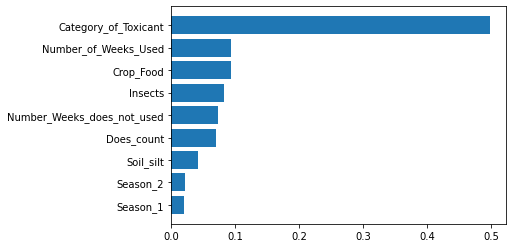

In [ ]:
print(model.feature_importances_)
print(model.importance_type)
#plt.barh(training_data.columns, model.feature_importances_)
#training_data.columns

sorted_idx = model.feature_importances_.argsort()
#plt.barh(training_data.columns[sorted_idx], model.feature_importances_[sorted_idx])
#plt.xlabel("Xgboost Feature Importance")
plt.barh(training_data.columns[sorted_idx], model.feature_importances_[sorted_idx])

Text(0.5, 0, 'Permutation Importance')

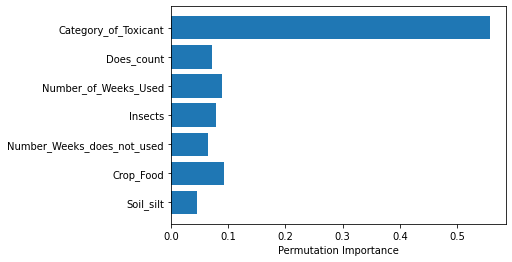

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(training_data.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
#adapted from https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(model.feature_importances_)

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train.fillna(X_train['Number_of_Weeks_Used'].mean(), axis = 1))
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test.fillna(X_test['Number_of_Weeks_Used'].mean(), axis = 1))
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.021, n=9, Accuracy: 84.26%
Thresh=0.023, n=8, Accuracy: 84.26%
Thresh=0.042, n=7, Accuracy: 84.26%
Thresh=0.071, n=6, Accuracy: 84.24%
Thresh=0.074, n=5, Accuracy: 83.85%
Thresh=0.084, n=4, Accuracy: 83.86%
Thresh=0.094, n=3, Accuracy: 83.94%
Thresh=0.094, n=2, Accuracy: 83.89%
Thresh=0.498, n=1, Accuracy: 83.89%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
#training_data.dropna(inplace = True)
#training_data.fillna(training_data['Number_of_Weeks_Used'].median(), axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, stratify = y)

scorers = ['f1_weighted', 'accuracy','mlogloss']
param_grid = {'n_estimators': [600, 900, 1200, 1500],
              'max_depth': [3,6,9,12],
              'learning_rate': [0.003, 0.01, 0.03]}

skf = StratifiedKFold(n_splits=3,shuffle = True, random_state=42)
model = XGBClassifier(missing = np.nan, objective="multi:softmax", num_class = 3, eval_metric = ["mlogloss"])
print(model)
grd_xbg = RandomizedSearchCV(model, param_grid, scoring=scorers, refit = 'accuracy', cv=skf, verbose = 3, n_jobs = -1, n_iter = 1)
grd_xbg.fit(training_data, y)

print("Best: %f using %s" % (grd_xbg.best_score_, grd_xbg.best_params_))

print(grd_xbg.best_estimator_)

pd.DataFrame(grd_xbg.cv_results_)



 # Training_acc 0.852171875
#Testing acc 0.8453125
#[[13095   270     1]
 #[ 1799   427     0]
 #[  274   131     3]] - 1500, max_depth = 3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['mlogloss'],
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softmax',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)


ValueError: ignored

In [ ]:
import sklearn.metrics
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score, log_loss
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
#training_data.dropna(inplace = True)
#training_data.fillna(training_data['Number_of_Weeks_Used'].median(), axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, stratify = y)

tuned_parameters = {'learning_rate': [0.4,0.5],
        'max_depth': [6,7]
    }

params={
    "eval_set":[(X_test, y_test)],
    "eval_metric": 'mlogloss',
    "early_stopping_rounds":100,
    "verbose":True
}

def _score_func(estimator, training_data, y):
    score1 = log_loss(y,estimator.predict_proba(X,
                           ntree_limit=estimator.best_ntree_limit),
                          labels=[0, 1, 2])
    return -score1

model = XGBClassifier( objective ='multi:softprob',  seed=0,n_estimators=1000)
gridsearch = GridSearchCV(model, tuned_parameters, verbose=999999 ,
    scoring=_score_func, fit_params = params)
gridsearch.fit(X_train, y_train)

print (gridsearch.best_params_)
print (gridsearch.best_score_)

# scorers = ['f1_weighted', 'accuracy']
# param_grid = {'n_estimators': [600, 900, 1200, 1500],
#               'max_depth': [3,6,9,12],
#               'learning_rate': [0.003, 0.01, 0.03]}

# skf = StratifiedKFold(n_splits=3,shuffle = True, random_state=42)
# model = XGBClassifier(missing = np.nan, objective="multi:softmax", num_class = 3, eval_metric = ["mlogloss"])
# print(model)
# grd_xbg = GridSearchCV(model, param_grid, scoring=scorers, refit = 'accuracy', cv=skf, verbose = 10, n_jobs = -1)
# grd_xbg.fit(training_data, y)

# print("Best: %f using %s" % (grd_xbg.best_score_, grd_xbg.best_params_))

# print(grd_xbg.best_estimator_)

# pd.DataFrame(grd_xbg.cv_results_)



 # Training_acc 0.852171875
#Testing acc 0.8453125
#[[13095   270     1]
 #[ 1799   427     0]
 #[  274   131     3]] - 1500, max_depth = 3

TypeError: ignored

In [ ]:
means = grd_xbg.cv_results_['mean_test_accuracy']
stds = grd_xbg.cv_results_['std_test_accuracy']
params = grd_xbg.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.842138 (0.000591) with: {'n_estimators': 100}
0.843325 (0.000444) with: {'n_estimators': 150}
0.844062 (0.000712) with: {'n_estimators': 200}
0.844600 (0.000584) with: {'n_estimators': 250}
0.845062 (0.000391) with: {'n_estimators': 300}
0.845500 (0.000363) with: {'n_estimators': 350}
0.845462 (0.000233) with: {'n_estimators': 400}
0.845562 (0.000493) with: {'n_estimators': 450}
0.845562 (0.000384) with: {'n_estimators': 500}
0.845637 (0.000529) with: {'n_estimators': 550}
0.845800 (0.000638) with: {'n_estimators': 600}
0.845775 (0.000371) with: {'n_estimators': 650}
0.845887 (0.000550) with: {'n_estimators': 700}
0.845900 (0.000524) with: {'n_estimators': 750}
0.845900 (0.000406) with: {'n_estimators': 800}
0.845637 (0.000327) with: {'n_estimators': 850}
0.845487 (0.000293) with: {'n_estimators': 900}
0.845550 (0.000370) with: {'n_estimators': 950}
0.845662 (0.000402) with: {'n_estimators': 1000}
0.845587 (0.000388) with: {'n_estimators': 1050}
0.845600 (0.000287) with: {'n_estimato

In [ ]:
pd.DataFrame(grd_xbg.cv_results_)

mean_fit_time  std_fit_time  ...  std_test_accuracy  rank_test_accuracy
0        9.771805      0.021305  ...           0.000591                  38
1       14.460069      0.066824  ...           0.000444                  37
2       19.205235      0.101946  ...           0.000712                  36
3       23.873769      0.098108  ...           0.000584                  35
4       28.454478      0.039768  ...           0.000391                  34
5       33.166256      0.128918  ...           0.000363                  20
6       37.973375      0.132108  ...           0.000233                  22
7       42.794865      0.179039  ...           0.000493                  17
8       47.302388      0.195607  ...           0.000384                  16
9       53.872399      1.672845  ...           0.000529                  12
10      56.446082      0.157918  ...           0.000638                   4
11      60.715539      0.267043  ...           0.000371                   5
12      65.650957      0.305794  ...           0.000550                   3
13      70.394433      0.282992  ...           0.000524                   2
14      75.174420      0.220606  ...           0.000406                   1
15      82.676857      2.150091  ...           0.000327                  11
16      84.662732      0.440593  ...           0.000293                  21
17      89.045109      0.383566  ...           0.000370                  18
18      93.672174      0.448552  ...           0.000402                   9
19     101.039025      2.148921  ...           0.000388                  14
20     102.362047      0.438904  ...           0.000287                  13
21     107.018321      0.440214  ...           0.000303                   8
22     112.296945      0.294747  ...           0.000101                  10
23     119.594702      1.999981  ...           0.000276                  15
24     121.224404      0.219913  ...           0.000402                   6
25     126.367683      0.462611  ...           0.000458                   7
26     133.636556      2.112341  ...           0.000294                  19
27     135.833617      0.399396  ...           0.000374                  25
28     140.122071      0.316293  ...           0.000278                  29
29     144.639465      0.454468  ...           0.000327                  30
30     150.271827      0.409479  ...           0.000540                  32
31     154.415620      0.300244  ...           0.000529                  23
32     158.891200      0.516805  ...           0.000512                  24
33     163.545331      0.689355  ...           0.000503                  26
34     168.991476      0.595327  ...           0.000563                  33
35     172.244673      0.226050  ...           0.000679                  27
36     176.819091      0.302187  ...           0.000664                  28
37     170.786807     15.755347  ...           0.000681                  31

[38 rows x 18 columns]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, f1_score

param_grid = {
    'min_child_weight': [1, 3, 5, 7, 10],
    'n_estimators' : list(range(100,2000,100)),
    'max_depth': [3, 5, 6, 7, 8, 12],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7, 1],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'learning_rate': list(np.arange(0.05,0.8,0.05))
}
def grid_search_strat(refit_str):
  scorers = ['f1_weighted', 'accuracy']
  model = xgb.XGBClassifier(objective = 'multi:softmax', num_class = 3)
  skf = StratifiedKFold(n_splits=3,shuffle = True, random_state=42)

  grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=skf, scoring=scorers, refit = refit_str, n_iter = 5, verbose = 2)
  grid_search.fit(training_data, y, sample_weight = dtrain_weights(y, 1, 1, 1))
  # summarize results
  print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

  print(grid_search.best_estimator_)

  print(pd.DataFrame(grid_search.cv_results_))

grid_search_strat('f1_weighted')


In [ ]:
# Voting Classifier - Multiple Model Ensemble 
from sklearn.svm import SVC
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42)

xgb1 = XGBClassifier(n_estimators= 1500)
rf = RandomForestClassifier(n_estimators=2000, max_depth = 4, max_features="sqrt")
xgb2 = XGBClassifier(n_estimators= 700, max_depth = 2, learning_rate=0.05)
evc = VotingClassifier( estimators= [('xgb1',xgb1),('rf',rf), ('xgb2', xgb2)], voting = 'soft', weights = [5, 3, 1])

evc.fit(X_train, y_train, compute_sample_weight("balanced",y_train)) #compute_sample_weight("balanced",y_train)

print("Score", evc.score(X_test, y_test))

y_train_pred = evc.predict(X_train)
pred = evc.predict(X_test)
print("Training_acc", accuracy_score(y_train, y_train_pred))
print("Testing acc", accuracy_score(y_test, pred))
print("F1 score: ", f1_score(y_test, pred, average='weighted'))
print(pd.crosstab(y_test, pred))
print(classification_report(y_test, pred))


 # Training_acc 0.852171875
#Testing acc 0.8453125
#[[13095   270     1]
 #[ 1799   427     0]
 #[  274   131     3]] - 1500, max_depth = 3

Score 0.510625
Training_acc 0.52275
Testing acc 0.510625
F1 score:  0.6150254224156709
col_0           0     1     2
Crop_status                  
0            7388  1583  4395
1             367   447  1412
2              35    38   335
              precision    recall  f1-score   support

           0       0.95      0.55      0.70     13366
           1       0.22      0.20      0.21      2226
           2       0.05      0.82      0.10       408

    accuracy                           0.51     16000
   macro avg       0.41      0.52      0.34     16000
weighted avg       0.82      0.51      0.62     16000



In [ ]:
from sklearn.metrics import log_loss
y_val_pred = evc.predict_proba(X_test)
log_loss(y_test, y_val_pred)

0.49934744029870787

NameError: ignored

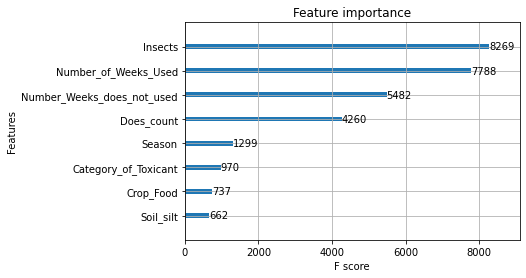

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model)
pyplot.show()

In [ ]:
training_data.fillna(training_data['Number_of_Weeks_Used'].median(), axis = 1, inplace = True)

In [ ]:
#bagging

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42)
#bg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, n_jobs = -1, n_estimators = 100)

bg = BaggingClassifier(KNeighborsClassifier(n_neighbors=3, weights = 'distance')) #max_samples=0.5, max_features=0.5


bg.fit(X_train, y_train)
print("Score: ", bg.score(X_test, y_test))
y_train_pred = bg.predict(X_train)
pred = bg.predict(X_test)
print("Training_acc", accuracy_score(y_train, y_train_pred))
print("Testing acc", accuracy_score(y_test, pred))
#print("F1 score: ", f1_score(y_test, pred, average='micro'))
print(pd.crosstab(y_test, pred))
print(classification_report(y_test, pred))

Score:  0.79275
Training_acc 0.967453125
Testing acc 0.79275
col_0            0     1    2
Crop_status                  
0            12177  1028  161
1             1669   487   70
2              248   140   20
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     13366
           1       0.29      0.22      0.25      2226
           2       0.08      0.05      0.06       408

    accuracy                           0.79     16000
   macro avg       0.41      0.39      0.40     16000
weighted avg       0.76      0.79      0.78     16000



In [ ]:
#Boosting
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state = 42)
adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=1000)

adb.fit(X_train, y_train)

print("Score", adb.score(X_test, y_test))

y_train_pred = adb.predict(X_train)
pred = adb.predict(X_test)
print("Training_acc", accuracy_score(y_train, y_train_pred))
print("Testing acc", accuracy_score(y_test, pred))
#print("F1 score: ", f1_score(y_test, pred, average='micro'))
print(pd.crosstab(y_test, pred))
print(classification_report(y_test, pred))


#col_0            0    1  2
#Crop_status                1500 missing data xgb
#0            11732  251  0
#1             1590  450  2
#2              221  143  0

#precision    recall  f1-score   support

 #     0.87      0.98      0.92     11983
  #    0.54      0.23      0.32      2042
   #   0.25      0.00      0.01       364

Score 0.7297240947946347
Training_acc 0.7973278198623949
Testing acc 0.7297240947946347
col_0           0     1    2
Crop_status                 
0            9844  2024  115
1            1301   634  107
2             210   132   22
              precision    recall  f1-score   support

           0       0.87      0.82      0.84     11983
           1       0.23      0.31      0.26      2042
           2       0.09      0.06      0.07       364

    accuracy                           0.73     14389
   macro avg       0.39      0.40      0.39     14389
weighted avg       0.76      0.73      0.74     14389



In [ ]:
Training_acc 0.852171875
Testing acc 0.8453125
[[13095   270     1]
 [ 1799   427     0]
 [  274   131     3]] - 1500, max_depth = 3
 
Training_acc 0.847234375
Testing acc 0.84375
[[13150   216     0]
 [ 1876   350     0]
 [  290   118     0]] - 1500, max_depth = 2


---------------------------------
Training_acc 0.84409375
Testing acc 0.841125
[[13148   137     0]
 [ 2001   310     0]
 [  315    89     0]] #100 0.12999999999999998

Training_acc 0.844078125
Testing acc 0.8405625
[[13156   129     0]
 [ 2018   293     0]
 [  318    86     0]] 700 0.02

 Training_acc 0.852
Testing acc 0.8459375
[[13046   235     4]
 [ 1819   487     5]
 [  269   133     2]] 1460

In [ ]:
import xgboost as xgb

xgb1 = XGBClassifier()

dtrain = xgb.DMatrix(X_train, label=y_train, weight)
dtest = xgb.DMatrix(X_test, label=y_test)
predictors = ['Insects', 'Category_of_Toxicant', 'Does_count', 'Number_of_Weeks_Used', 'Number_Weeks_does_not_used', 'Season', 'Crop_Food', 'Soil_silt']

params = {
    # Parameters that we are going to tune.
    'n_estimators': 1500,
    'learning_rate': 0.05,
    'max_depth':2,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

params['eval_metric'] = "auc"

num_boost_round = 999

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100,
)

cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'auc'},
    early_stopping_rounds=100
)
print(cv_results)

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]


min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].max()
    boost_rounds = cv_results['test-mae-mean'].argmax()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Crop_status'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Crop_status'],eval_metric='auc')
        
    #Predict training set:
    
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain['Crop_status'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain['Crop_status'], dtrain_predprob))
                    

SyntaxError: ignored

In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 3.1MB 7.3MB/s 
     |████████████████████████████████| 604kB 28.8MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 296kB 26.9MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=feb34812125cb61a38b208cebfa9278dbf6f9d4d016e076be6e0d1a723a16350
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=c63cf205265bc48f41bb951ff0d7b4ec5932fcc7fbde5fb93e5270ca2f0af39e
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [ ]:
df.head()

Insects  Crop  Soil  ...  Number_Weeks_does_not used  Season  Crop_status
0      188  Feed  clay  ...                           0       1            0
1      209  Feed  clay  ...                           0       2            1
2      257  Feed  clay  ...                           0       2            1
3      257  Feed  silt  ...                           0       2            1
4      342  Feed  clay  ...                           0       2            1

[5 rows x 9 columns]

In [ ]:
import pandas_profiling as pp 
profile = pp.ProfileReport(df)

profile.to_file("output_profile_ML.html") 

In [ ]:
profile

In [ ]:
pred
from google.colab import files

#data.to_excel(r'C:\Users\rallam\Desktop\ML_Hackathon\nan.xlsx', index = False)
pred.to_csv('pred_3.csv') 
files.download('pred_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
temp = {"Y1": ['a', 'b', 'c', 'b', 'e','e', 'e'],
        "Y2": ['c', 'b', 'd', 'b', 'e','e', 'e']}

temp1_df = pd.DataFrame(temp)
temp1_df.head(6)

temp1_df.drop_duplicates()

Y1 Y2
0  a  c
1  b  b
2  c  d
4  e  e

In [ ]:
print(cross_val_score(model,training_data, y,cv=5))

Streaming output truncated to the last 5000 lines.
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:49:00] INFO: /workspace/src/tree/updater_p

In [ ]:
print(cross_val_score(RandomForestClassifier(n_estimators=1000, bootstrap = True, criterion = "gini", max_features="auto", max_depth = None, n_jobs = -1, min_samples_leaf = 10),training_data, y1,cv=5))

[1. 1. 1. 1. 1.]


In [ ]:
test_df_off = pd.read_excel('/content/drive/My Drive/ML_Hackathon/ML_Hackathon/test.xlsx')

test_df_off.drop('ID', axis = 1, inplace = True)

test_df_off.rename(columns={'Number_Weeks_does_not used': 'Number_Weeks_does_not_used'}, inplace=True)


test_df_off.head()

#training_data=pd.get_dummies(X, columns=["Crop","Soil"])



Insects  Crop  ... Number_Weeks_does_not_used  Season
0      188  Feed  ...                          0       2
1      410  Feed  ...                          0       2
2      626  Feed  ...                          0       2
3      731  Feed  ...                          0       2
4      789  Food  ...                          0       1

[5 rows x 8 columns]

In [ ]:
test_df_off=pd.get_dummies(test_df_off, columns=["Crop","Soil"])

test_df_off.drop('Soil_clay', axis = 1, inplace = True)

test_df_off.head()

Insects  Category_of_Toxicant  Does_count  ...  Crop_Feed  Crop_Food  Soil_silt
0      188                     1           0  ...          1          0          1
1      410                     1           0  ...          1          0          1
2      626                     1           0  ...          1          0          0
3      731                     1           0  ...          1          0          0
4      789                     1           0  ...          0          1          0

[5 rows x 9 columns]

In [ ]:
# missing val training

miss_test_df_off = test_df_off[["Insects", "Category_of_Toxicant", "Does_count", "Number_Weeks_does_not_used", "Season", "Crop_Feed", "Crop_Food","Soil_silt", "Number_of_Weeks_Used"]]

miss_test_df_off_nonull = miss_test_df_off.dropna()

train_data_X = miss_test_df_off_nonull[["Insects", "Category_of_Toxicant", "Does_count", "Number_Weeks_does_not_used", "Season", "Crop_Feed", "Crop_Food","Soil_silt"]]
train_data_y = miss_test_df_off_nonull["Number_of_Weeks_Used"]

In [ ]:
print(train_data_X.columns)
print(train_data_X.shape)


Index(['Insects', 'Category_of_Toxicant', 'Does_count',
       'Number_Weeks_does_not_used', 'Season', 'Crop_Feed', 'Crop_Food',
       'Soil_silt'],
      dtype='object')
(31458, 8)


In [ ]:
print(train_data_y.head())
print(train_data_y.shape)

1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: Number_of_Weeks_Used, dtype: float64
(31458,)


In [ ]:
rand_frst_clf = RandomForestClassifier(random_state=42, n_estimators = 100, bootstrap = True, criterion = "gini", max_features="sqrt")

rand_frst_clf.fit(train_data_X, train_data_y)

test_data = miss_test_df_off[["Insects", "Category_of_Toxicant", "Does_count", "Number_Weeks_does_not_used", "Season", "Crop_Feed", "Crop_Food","Soil_silt"]]

missing_val = test_df_off.copy()
missing_val['Number_of_Weeks_Used'] = pd.DataFrame(rand_frst_clf.predict(test_data))
miss_test_df_off.Number_of_Weeks_Used.fillna(missing_val.Number_of_Weeks_Used, inplace=True)
miss_test_df_off.head(25)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Insects  Category_of_Toxicant  ...  Soil_silt  Number_of_Weeks_Used
0       188                     1  ...          1                   0.0
1       410                     1  ...          1                   0.0
2       626                     1  ...          0                   0.0
3       731                     1  ...          0                   0.0
4       789                     1  ...          0                   0.0
5       851                     1  ...          1                   0.0
6       851                     1  ...          0                   0.0
7      1056                     1  ...          0                   0.0
8      1576                     1  ...          0                   0.0
9      1576                     1  ...          0                   0.0
10     1576                     1  ...          1                   0.0
11     1898                     1  ...          1                   0.0
12     1898                     1  ...          0                   0.0
13     2016                     1  ...          0                   0.0
14     2015                     1  ...          0                   0.0
15     2267                     1  ...          0                   0.0
16     2541                     1  ...          0                   0.0
17     2541                     1  ...          0                   0.0
18     2840                     1  ...          0                   0.0
19     2999                     1  ...          0                   0.0
20     3164                     1  ...          1                   0.0
21     3336                     1  ...          1                   0.0
22      150                     3  ...          0                  20.0
23      150                     3  ...          0                  19.0
24      168                     3  ...          1                  10.0

[25 rows x 9 columns]

In [ ]:
#test_df_off['Number_of_Weeks_Used'] = miss_test_df_off['Number_of_Weeks_Used']
test_df_off.fillna(test_df_off['Number_of_Weeks_Used'].median(), inplace = True)
test_df_off.isnull().sum()

Insects                       0
Category_of_Toxicant          0
Does_count                    0
Number_of_Weeks_Used          0
Number_Weeks_does_not_used    0
Season                        0
Crop_Feed                     0
Crop_Food                     0
Soil_silt                     0
dtype: int64

In [ ]:

from google.colab import files
test_df_off.head(50)
#data.to_excel(r'C:\Users\rallam\Desktop\ML_Hackathon\nan.xlsx', index = False)
test_df_off.to_csv('test_pred.csv') 
files.download('test_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
training_data.drop('Crop_status', axis = 1, inplace = True)

KeyError: ignored

In [ ]:
#print(training_data.shape, training_data.columns)

#print(y1.shape, y1.head(15))
print(test_df_off.shape, test_df_off.head(5))

(35000, 9)    Insects  Category_of_Toxicant  Does_count  ...  Crop_Feed  Crop_Food  Soil_silt
0      188                     1           0  ...          1          0          1
1      410                     1           0  ...          1          0          1
2      626                     1           0  ...          1          0          0
3      731                     1           0  ...          1          0          0
4      789                     1           0  ...          0          1          0

[5 rows x 9 columns]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
training_data.head()
test_df_off.head()

Insects  Category_of_Toxicant  Does_count  ...  Crop_Feed  Crop_Food  Soil_silt
0      188                     1           0  ...          1          0          1
1      410                     1           0  ...          1          0          1
2      626                     1           0  ...          1          0          0
3      731                     1           0  ...          1          0          0
4      789                     1           0  ...          0          1          0

[5 rows x 9 columns]

In [ ]:
rand_forest_final = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=None, max_features="sqrt", min_samples_leaf=2, min_samples_split=10, n_estimators=1000)
rand_forest_final.fit(training_data, y)


pred = pd.DataFrame(rand_forest_final.predict(test_df_off))


In [ ]:
pred.shape
pred.to_csv('pred_2.csv') 
files.download('pred_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pred.shape
pred

0
0      1
1      1
2      1
3      1
4      1
...   ..
34995  0
34996  0
34997  0
34998  0
34999  0

[35000 rows x 1 columns]